Importing Libraries

In [1]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Convolution2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.datasets import mnist
from keras.utils import np_utils
import numpy 
import tensorflow 

Loading Data

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


Reshaping Data

In [4]:
x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)

In [5]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

Normalizing

In [6]:
x_train /= 255
x_test /= 255

One Hot Encoding

In [7]:
number_of_classes = 10 
y_train = np_utils.to_categorical(y_train, number_of_classes) 
y_test = np_utils.to_categorical(y_test, number_of_classes)

Creating Model

In [8]:
model = Sequential() 
model.add(Convolution2D(64, (3, 3), input_shape=(28, 28, 1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Convolution2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(number_of_classes, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        18464     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense (Dense)                (None, 10)                8010      
Total params: 27,114
Trainable params: 27,114
Non-trainable params: 0
____________________________________________________

Compiling the model

In [9]:
model.compile(loss='categorical_crossentropy', optimizer="Adam", metrics=['accuracy'])

Fitting the model

In [10]:
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=30, batch_size=32)

Epoch 1/30
1875/1875 [==============================] - 72s 38ms/step - loss: 0.1704 - accuracy: 0.9487 - val_loss: 0.0589 - val_accuracy: 0.9808
Epoch 2/30
1875/1875 [==============================] - 71s 38ms/step - loss: 0.0587 - accuracy: 0.9819 - val_loss: 0.0437 - val_accuracy: 0.9861
Epoch 3/30
1875/1875 [==============================] - 73s 39ms/step - loss: 0.0441 - accuracy: 0.9866 - val_loss: 0.0425 - val_accuracy: 0.9857
Epoch 4/30
1875/1875 [==============================] - 82s 44ms/step - loss: 0.0347 - accuracy: 0.9895 - val_loss: 0.0363 - val_accuracy: 0.9884
Epoch 5/30
1875/1875 [==============================] - 85s 45ms/step - loss: 0.0299 - accuracy: 0.9908 - val_loss: 0.0387 - val_accuracy: 0.9872
Epoch 6/30
1875/1875 [==============================] - 84s 45ms/step - loss: 0.0238 - accuracy: 0.9924 - val_loss: 0.0406 - val_accuracy: 0.9858
Epoch 7/30
1875/1875 [==============================] - 77s 41ms/step - loss: 0.0200 - accuracy: 0.9936 - val_loss: 0.0362 -

Observing the Metrics

In [11]:
metrics = model.evaluate(x_test, y_test, verbose=0)
print("Metrics(Test loss & Test Accuracy): ")
print(metrics)

Metrics(Test loss & Test Accuracy): 
[0.07054636627435684, 0.9894000291824341]


Saving the Model

In [12]:
model.save("mnistCNN.h5")

Loading the image and taking input and Predicting Output

In [13]:
from tensorflow.keras.models import load_model
from keras.preprocessing import image
import numpy as np
model=load_model("mnistCNN.h5")
img=image.load_img(r"D:\2021-2022(odd-June to Dec)(even-Jan to May)\AI\daily code\Flask\zdummy\Hand_Written_Recognition_System-main\Flask App\input images\4.png",target_size=(28,28))


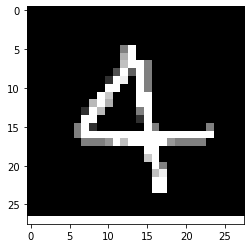

In [14]:
import matplotlib.pyplot as plt #used for data visualization
plt.imshow(img)

In [15]:
x=image.img_to_array(img) 

In [16]:
x = x[:,:,0]

In [17]:
x=np.expand_dims(x,axis=0)

In [18]:
x.shape

(1, 28, 28)

In [19]:
x= x.reshape(1, 28, 28, 1)

In [20]:
x/= 255
x

array([[[[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         

In [21]:
y=model.predict(x)

In [22]:
pred=np.argmax(y, axis=1)

In [23]:
pred

array([4], dtype=int64)

In [24]:
if(pred == 0) :
    print("Zero")
elif(pred == 1) :
    print("One")
elif(pred == 2) :
    print("Two")
elif(pred == 3) :
    print("Three")
elif(pred == 4) :
    print("Four")
elif(pred == 5) :
    print("Five")
elif(pred == 6) :
    print("Six")
elif(pred == 7) :
    print("Seven")
elif(pred == 8) :
    print("Eight")
else:
    print("Nine")

Four
